In [1]:
import torch
import numpy as np 
from torch.utils.data import TensorDataset, DataLoader
import torchvision as vision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/python3.8/site-packages/torchvision/image.so
  Reason: tried: '/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/libpng16.16.dylib' (no such file), '/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/libpng16.16.dylib' (no such file), '/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/python3.8/lib-dynload/../../libpng16.16.dylib' (no such file), '/Users/daniyar/opt/miniconda3/envs/nightly_venv/lib/libpng16.16.dylib' (no such file), '/Users/daniyar/opt/miniconda3/envs/nightly_venv/bin/../lib/libpng16.16.dylib' (no such file), '/usr/local/lib/libpng16.16.dylib' (no such file), '/usr/lib/libpng16.16.dyli

In [51]:
dataset = MNIST(root = 'data/', download = True)
print(len(dataset))
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())
print(len(test_dataset))

60000
10000


In [3]:
%matplotlib inline

Label: 5


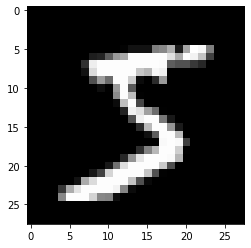

In [4]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

Label: 4


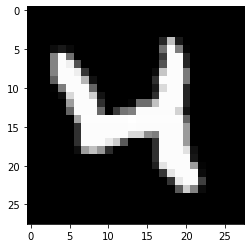

In [5]:
image, label = dataset[20]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [6]:
import torchvision.transforms as transforms

In [7]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


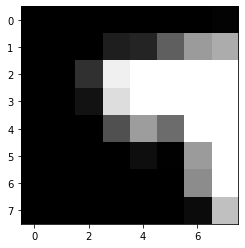

In [9]:
plt.imshow(img_tensor[0, 5:13, 5:13], cmap = 'gray')

In [16]:
# now, we have to learn how to use training and validation sets.
#Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
#Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
#Test set - used to compare different models or approaches and report the model's final accuracy.
# random_split method let's us split data. 

from torch.utils.data import random_split

In [17]:
train_data, validation_data = random_split(dataset, [50000, 10000])

In [18]:
# now we'll create batches of data to use in training
# batch of data is essentially a heap of data

batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(validation_data, batch_size)

In [19]:
# logistic regression contains bias and weights.
# we will use nn.Linear to create model. this method expects a 1D vector,
# so we have to flatten our tensors (28 * 28), making them a 784 vector

import torch.nn as nn

In [20]:
input_size = 28 * 28
num_classes = 10

In [49]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
logistic_model = MnistModel()

In [23]:
for images, labels in train_loader: 
    print(images.shape)
    outputs = logistic_model(images)
    break
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[-3.2611e-01, -2.7880e-01,  1.1804e-01, -5.9630e-02,  1.0410e-01,
         -7.2004e-02, -4.0993e-02,  8.2067e-02, -4.7410e-02,  3.2639e-02],
        [-2.3112e-01, -1.7909e-01, -4.9188e-02, -2.3669e-04, -6.7641e-02,
          1.7172e-01,  1.2652e-01,  1.3423e-01, -2.0744e-01, -1.5555e-02]])


In [24]:
import torch.nn.functional as F

In [25]:
probs = F.softmax(outputs, dim = 1)

print('Sample probs : \n', probs[:2].data)

Sample probs : 
 tensor([[0.0750, 0.0787, 0.1170, 0.0980, 0.1154, 0.0967, 0.0998, 0.1129, 0.0992,
         0.1074],
        [0.0812, 0.0855, 0.0974, 0.1022, 0.0956, 0.1214, 0.1161, 0.1169, 0.0831,
         0.1007]])


In [26]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([2, 5, 7, 7, 7, 9, 9, 6, 4, 5, 8, 7, 7, 0, 2, 2, 7, 7, 7, 2, 0, 2, 0, 7,
        3, 7, 0, 9, 7, 2, 9, 6, 2, 2, 0, 9, 2, 9, 2, 4, 3, 2, 6, 3, 9, 9, 2, 9,
        7, 0, 7, 9, 7, 6, 3, 7, 4, 0, 9, 3, 7, 7, 2, 7, 7, 2, 7, 9, 9, 6, 7, 2,
        6, 6, 2, 7, 7, 9, 7, 2, 7, 7, 2, 2, 4, 7, 6, 5, 7, 0, 6, 9, 7, 6, 2, 7,
        2, 6, 2, 3, 2, 7, 7, 6, 6, 2, 7, 6, 4, 6, 7, 7, 2, 9, 7, 7, 9, 7, 3, 7,
        2, 2, 7, 7, 2, 7, 3, 6])
tensor([0.1170, 0.1214, 0.1154, 0.1415, 0.1403, 0.1623, 0.1335, 0.1301, 0.1198,
        0.1196, 0.1357, 0.1373, 0.1401, 0.1329, 0.1134, 0.1254, 0.1355, 0.1382,
        0.1260, 0.1282, 0.1354, 0.1165, 0.1224, 0.1194, 0.1263, 0.1156, 0.1258,
        0.1301, 0.1281, 0.1184, 0.1373, 0.1530, 0.1433, 0.1410, 0.1196, 0.1193,
        0.1242, 0.1407, 0.1185, 0.1224, 0.1249, 0.1642, 0.1232, 0.1181, 0.1274,
        0.1618, 0.1444, 0.1324, 0.1228, 0.1238, 0.1198, 0.1087, 0.1383, 0.1324,
        0.1196, 0.1421, 0.1243, 0.1227, 0.1389, 0.1139, 0.1418, 0.1143, 0.1130,
       

In [27]:
# does not work very well, the probabilitiess are very low. 
# well , we did not even train the model, so it is expected. 
# let's start the training by firstly defining evaluation metrics
# first of which usually is the accuracy of a given model.

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [28]:
# this will compute the average accuracy of our first batch of data
accuracy(outputs, labels) 

tensor(0.0703)

In [29]:
# whis is not very good. 10% of a correct guess on average is atrocious.
# common classification problems loss function is a binary cross-entropy funcion

# cross entropy is included in the torch.nn.functional and computes
# a softmax internally, so we can just pass our data to the function
# without needing to explicitly specify a softmax
loss_funct = F.cross_entropy

loss = loss_funct(outputs, labels)
print(loss)

# the result of a cross-entropy should be interpreted as e^(result).
# it shows about 10%. the lower the loss, the better your model is. 


tensor(2.3194, grad_fn=<NllLossBackward0>)


In [30]:
# pseudocode for the training function. some training functions are
# written like that. maybe many, I do not really know for now. Huh.


#for epoch in range(num_epochs):
    # Training phase
   # for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    #for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [31]:
# we will use problem-independent parts in a function called "fit"
# it will be used for our training
# problem specific parts, on the other hand, will be implemented in a 
# nn.Module class extension

def fit(epochs, lr, model, train_loader, val_loader, opt_funct = torch.optim.SGD):
    optimizer = opt_funct(model.parameters(), lr)
    history = [] #for the recording of results
    
    for epoch in range(epochs):
    
    # Training
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    # Validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [32]:
# Configurations like batch size, learning rate, etc.(called hyperparameters)
# , need to be picked in advance while training machine learning models.

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [33]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() #combine batch losses and find the average loss on 1 batch
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean() #combine the batch accuracies and find the average accuracy on 1 batch of data
        return {'val_loss' : epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [34]:
# let's run the model once before training it.
# we will run the model on the validation set. 
intermediate_result = evaluate(model, val_loader)
print(intermediate_result)

{'val_loss': 2.3190975189208984, 'val_acc': 0.12440664321184158}


In [36]:
# accuracy is about 10% and the loss is about 2.3, which does not
# really say a lot to me

# let's start training the model itself
history1 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.9478, val_acc: 0.6080
Epoch [1], val_loss: 1.6776, val_acc: 0.7375
Epoch [2], val_loss: 1.4758, val_acc: 0.7763
Epoch [3], val_loss: 1.3231, val_acc: 0.7968
Epoch [4], val_loss: 1.2054, val_acc: 0.8080


In [38]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1128, val_acc: 0.8170
Epoch [1], val_loss: 1.0383, val_acc: 0.8237
Epoch [2], val_loss: 0.9775, val_acc: 0.8286
Epoch [3], val_loss: 0.9267, val_acc: 0.8338
Epoch [4], val_loss: 0.8837, val_acc: 0.8373


In [39]:
history3 = fit(15, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8470, val_acc: 0.8409
Epoch [1], val_loss: 0.8151, val_acc: 0.8441
Epoch [2], val_loss: 0.7873, val_acc: 0.8459
Epoch [3], val_loss: 0.7626, val_acc: 0.8492
Epoch [4], val_loss: 0.7407, val_acc: 0.8499
Epoch [5], val_loss: 0.7210, val_acc: 0.8517
Epoch [6], val_loss: 0.7033, val_acc: 0.8537
Epoch [7], val_loss: 0.6872, val_acc: 0.8560
Epoch [8], val_loss: 0.6725, val_acc: 0.8588
Epoch [9], val_loss: 0.6590, val_acc: 0.8595
Epoch [10], val_loss: 0.6466, val_acc: 0.8610
Epoch [11], val_loss: 0.6351, val_acc: 0.8622
Epoch [12], val_loss: 0.6245, val_acc: 0.8628
Epoch [13], val_loss: 0.6147, val_acc: 0.8643
Epoch [14], val_loss: 0.6054, val_acc: 0.8658


Text(0.5, 1.0, 'Accuracy VS. Number of Epochs')

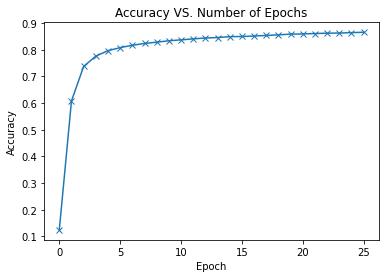

In [40]:
# as we can see, the accuracy gains are getting smaller and smaller.
# it is expected.
# let's plot the epoch VS accuracy dependency

history = [intermediate_result] + history1 + history2+history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy VS. Number of Epochs')

In [41]:
# I am dumb. the real epoch count is about 50, so the first better result
# starts at about 26th epoch ran. There is a good chance of 
# 90% tho.

# the learning rate might be too high. let's experiment a bit
# it was about 0.0004% of accuracy added with each epoch before

history2 = fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6011, val_acc: 0.8661
Epoch [1], val_loss: 0.5968, val_acc: 0.8673
Epoch [2], val_loss: 0.5927, val_acc: 0.8678
Epoch [3], val_loss: 0.5888, val_acc: 0.8691
Epoch [4], val_loss: 0.5849, val_acc: 0.8699


In [ ]:
# nothing really changed. so, it's not the learning rate
# the model is likely to be too simple for this task
# fuck, hehe....

In [42]:
# the issue is that we assume a linear relationship between the pixel
# color and the digit the image represents. it is a bad assumption
# actually. it works fairly well for a simpler dataset such as MNIST
# but is unlikely to be useful in more complicated ones.

In [53]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5697574019432068, 'val_acc': 0.8677734136581421}

In [ ]:
# how to save weights and biases so you don't have to re-train every model from scratch

torch.save(improved_logistic_model.state_dict(), 'mnist_logistic.pth')


In [57]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0011, -0.0318,  0.0285,  ...,  0.0156, -0.0327, -0.0071],
                      [ 0.0048,  0.0007,  0.0288,  ...,  0.0176, -0.0059, -0.0152],
                      [ 0.0125,  0.0333, -0.0171,  ...,  0.0119,  0.0185, -0.0347],
                      ...,
                      [ 0.0252, -0.0153,  0.0294,  ..., -0.0198,  0.0305, -0.0298],
                      [-0.0039,  0.0314, -0.0036,  ...,  0.0043, -0.0267,  0.0337],
                      [ 0.0101, -0.0304,  0.0123,  ...,  0.0258,  0.0194,  0.0231]])),
             ('linear.bias',
              tensor([-0.0440,  0.1093, -0.0223, -0.0239,  0.0048,  0.0572, -0.0219,  0.0287,
                      -0.1385, -0.0016]))])

In [55]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0205,  0.0237,  0.0057,  ...,  0.0321, -0.0335,  0.0261],
                      [ 0.0028, -0.0315, -0.0249,  ...,  0.0309,  0.0303, -0.0089],
                      [ 0.0229, -0.0121,  0.0244,  ..., -0.0116, -0.0106, -0.0238],
                      ...,
                      [-0.0262, -0.0306,  0.0041,  ..., -0.0218,  0.0141, -0.0063],
                      [-0.0089, -0.0023,  0.0308,  ..., -0.0007, -0.0344,  0.0347],
                      [ 0.0291,  0.0251,  0.0070,  ...,  0.0028, -0.0252,  0.0244]])),
             ('linear.bias',
              tensor([-0.0253, -0.0095, -0.0240,  0.0258,  0.0080,  0.0341,  0.0328,  0.0070,
                      -0.0126, -0.0060]))])

In [56]:
evaluate(model2, test_loader)

{'val_loss': 2.3286566734313965, 'val_acc': 0.06093750149011612}

In [58]:
model2.load_state_dict(torch.load('mnist_logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0236,  0.0288, -0.0217,  ...,  0.0136,  0.0006, -0.0136],
                      [-0.0190,  0.0132,  0.0113,  ...,  0.0202, -0.0007, -0.0218],
                      [-0.0132, -0.0218, -0.0010,  ..., -0.0153, -0.0063,  0.0181],
                      ...,
                      [-0.0276, -0.0264,  0.0022,  ..., -0.0292,  0.0128,  0.0271],
                      [-0.0058,  0.0227, -0.0071,  ...,  0.0026,  0.0296, -0.0029],
                      [-0.0187, -0.0077,  0.0120,  ...,  0.0344,  0.0055, -0.0185]])),
             ('linear.bias',
              tensor([-0.0604,  0.1518, -0.0523, -0.0237,  0.0329,  0.1023, -0.0154,  0.0959,
                      -0.2036, -0.0311]))])

In [59]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.461426317691803, 'val_acc': 0.88232421875}

In [60]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


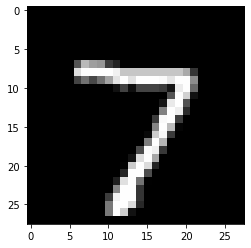

In [61]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


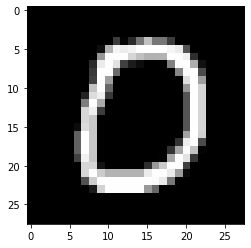

In [62]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 7


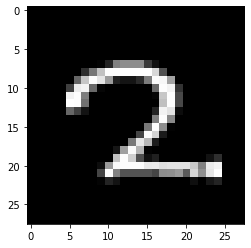

In [63]:
img, label = test_dataset[77]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


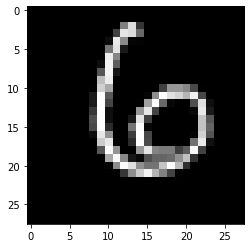

In [64]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))